# Description des données

## Packages

Voici la liste des packages utilisés pour étudier les données.

In [13]:
import pandas as pd
import pandas_profiling as pp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importation

Dans un premier temps, nous importons les données.

In [2]:
test = pd.read_csv("https://www.data.mclavier.com/prj_datascience/brut_test.csv")
train = pd.read_csv("https://www.data.mclavier.com/prj_datascience/brut_train.csv")
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,30,1,28,0,1-2 Year,Yes,26891,155,270,1
1,Male,28,1,28,1,< 1 Year,No,45434,152,146,0
2,Male,32,1,47,0,1-2 Year,No,2630,157,195,1
3,Male,54,1,28,0,1-2 Year,No,41420,26,121,0
4,Male,45,1,36,0,1-2 Year,Yes,32764,124,185,1


## Pandas profiling

Avant de commencer une analyse manuelle des variables, on utilise la librairie *pandas_profiling* pour avoir une première analyse rapide de notre jeu de données.

In [18]:
profile = pp.ProfileReport(train, title = "ISFA - Groupe 1 | Insurance cross-selling")
profile.to_file("data_desc.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 100.04it/s]


Le rapport de *pandas_profiling* est <a href = "https://www.data.mclavier.com/prj_datascience/data_desc.html">disponible ici</a>.

## Types


On identifie les types de chaque variable du jeu de données.

In [3]:
train.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

## Valeurs manquantes

Nous vérifions qu'il n'y ait pas de données absentes.

In [4]:
train.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Interprétations graphiques

Par la suite, nous créons différents graphique pour essayer de mieux comprendre les données en comprenant l'impact marginal des variables.

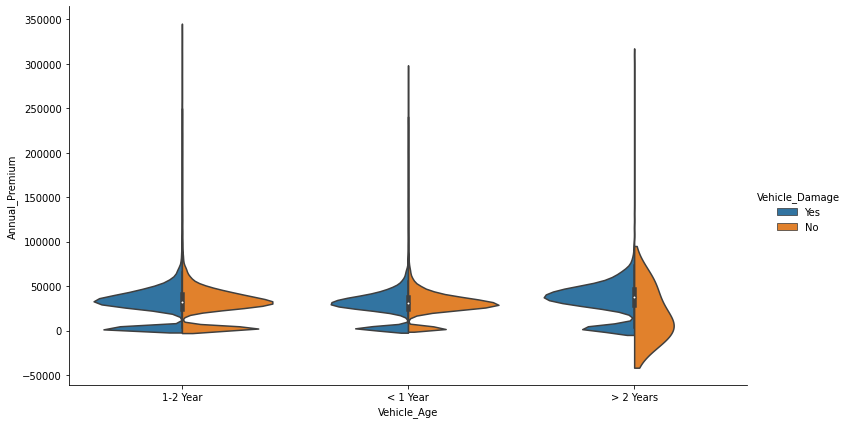

In [24]:
sns.catplot(data=train, kind="violin", x="Vehicle_Age", y="Annual_Premium", hue="Vehicle_Damage", split=True, height=6, aspect=16/9)

On remarque que la distribution des primes est significativement différentes pour les véhicules ayant plus de deux ans d'age en fonction qu'ils aient déjà eu ou non un accident.

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Annual_Premium'>

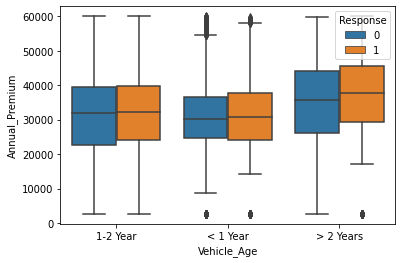

In [25]:
sns.boxplot(data = train[train["Annual_Premium"] < 60000], x="Vehicle_Age", y="Annual_Premium", hue="Response")
